In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
bankDf=pd.read_csv('bank.csv',delimiter=';')

In [105]:
bankDf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [106]:
from sklearn.preprocessing import LabelEncoder
lencode=LabelEncoder()

In [107]:
bankDf['y']=lencode.fit_transform(bankDf['y'])

In [108]:
bankDf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [109]:
bankDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int32 
dtypes: int32(1), int64(7), object(9)
memory usage: 582.9+ KB


In [110]:
bankDf.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [111]:
bank=bankDf[['age','balance','day','duration','campaign','pdays','previous','y']]

In [112]:
bank.head()

,age,balance,day,duration,campaign,pdays,previous,y
0,30,1787,19,79,1,-1,0,0
1,33,4789,11,220,1,339,4,0
2,35,1350,16,185,1,330,1,0
3,30,1476,3,199,4,-1,0,0
4,59,0,5,226,1,-1,0,0


In [113]:
bank['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

## #Visualization

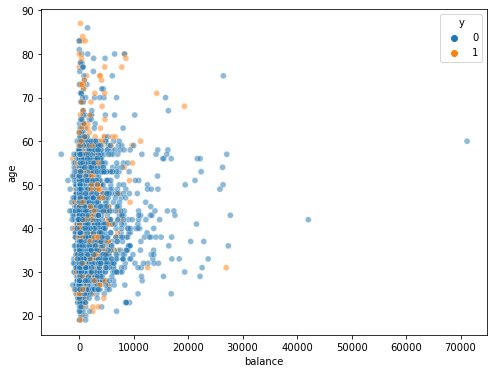

In [114]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=bank,x='balance',y='age',hue='y',alpha=0.5)
plt.show()

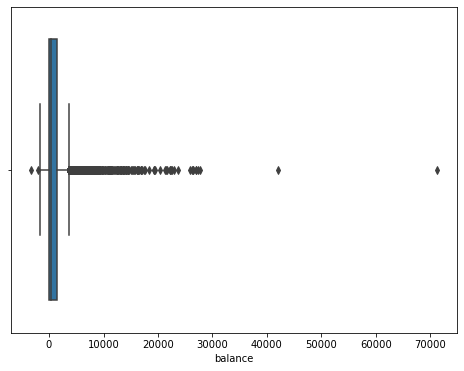

In [115]:
plt.figure(figsize=(8,6))
sns.boxplot(data=bank,x='balance',hue='y')
plt.show()

In [116]:
X=bank.drop(columns='y',axis=1).values
y=bank['y'].values

In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.25)

In [131]:
from sklearn.preprocessing import StandardScaler
stdSclar=StandardScaler()
stdSclar_Xtrain=stdSclar.fit_transform(X_train)
stdSclar_xtest=stdSclar.transform(X_test)

In [132]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [133]:
log_model.fit(stdSclar_Xtrain,y_train)

LogisticRegression()

In [134]:
log_model.coef_

array([[ 0.14577898,  0.08191713,  0.06614883,  0.95121498, -0.26535794,
         0.17811597,  0.20415755]])

In [135]:
log_model.predict_proba(stdSclar_xtest)

array([[0.84707555, 0.15292445],
       [0.94761161, 0.05238839],
       [0.89045377, 0.10954623],
       ...,
       [0.96119405, 0.03880595],
       [0.97098622, 0.02901378],
       [0.74450506, 0.25549494]])

In [136]:
y_pred=log_model.predict(stdSclar_xtest)

In [137]:
#model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Acc_score=accuracy_score(y_test,y_pred)


In [138]:
Acc_score

0.8859416445623343

In [139]:
confusion_matrix(y_test,y_pred)

array([[979,  21],
       [108,  23]], dtype=int64)

In [140]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1000
           1       0.52      0.18      0.26       131

    accuracy                           0.89      1131
   macro avg       0.71      0.58      0.60      1131
weighted avg       0.86      0.89      0.86      1131



In [32]:
from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


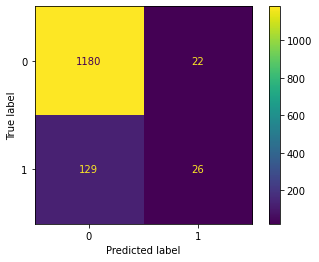

In [42]:
plot_confusion_matrix(log_model,stdSclar_xtest,y_test,cmap='viridis')

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


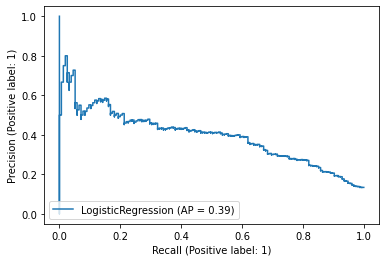

In [50]:
#precision curve
plot_precision_recall_curve(log_model,stdSclar_xtest,y_test)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


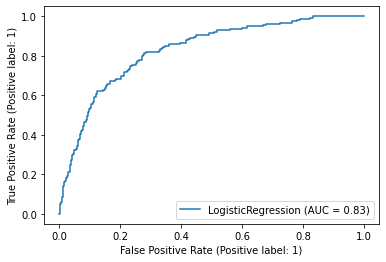

In [48]:
#roc curve
plot_roc_curve(log_model,stdSclar_xtest,y_test)

In [68]:
# ## Performance testing
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# log_model1=LogisticRegression(solver='saga',multi_class='ovr',max_iter=1000)


## GridSearch for Best Hyper-Parameters

In [79]:
# penalty=['l1','l2','elasticnet']
# C=np.logspace(0,4,10)
# l1_ratio=np.linspace(10,5)
# grid_model=GridSearchCV(log_model1,param_grid={'C':C,'penalty':penalty,"l1_ratio":l1_ratio})
# grid_model.fit(stdSclar_Xtrain,y_train)
# grid_model.best_params_
# y_gridpredict=grid_model.predict(X_test)
# accuracy_score(y_test,y_gridpredict)

## #Model Performance on Classification Tasks

0.12011790714812086

In [86]:
# confusion_matrix(y_test,y_gridpredict)

array([[   8, 1194],
       [   0,  155]], dtype=int64)

In [87]:
# print(classification_report(y_test,y_gridpredict))

              precision    recall  f1-score   support

           0       1.00      0.01      0.01      1202
           1       0.11      1.00      0.21       155

    accuracy                           0.12      1357
   macro avg       0.56      0.50      0.11      1357
weighted avg       0.90      0.12      0.04      1357

